# Tarea 3

## Primera fase - Pre Procesado 

Durante esta fase se empieza con la carga de los datos, posteriormente descripción de las variables y si tenemos datos perdidos o NA. 

Posteriormente ante esa presencia se hace un estudio de las variables y se trata de lidiar con los datos perdidos, ya sea por metodos de estimación de los datos o si descarta del todo las observaciones

In [259]:
import pandas as pd
import numpy as np

In [260]:
df = pd.read_csv("wineQualityReds.xls")

In [261]:
df.shape

(1599, 13)

In [262]:
df.columns

Index(['Unnamed: 0', 'fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

Lo primero que podemos observar es que la base tiene 13 columnas de las cuales la columna unamed se refiere al indice y por tanto la podemos eleminar del conjunto de datos

In [263]:
df = df.drop("Unnamed: 0", axis=1)


In [264]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [265]:
df.shape

(1599, 12)

Ahora que tenemos los datos un poco más limpios podemos proceder a observar si existen valores perdidos

In [266]:
df.isnull().values.any()

False

Como dentro del data set no existen valores perdidos podemos continuar con un análisis descriptivo de los datos 

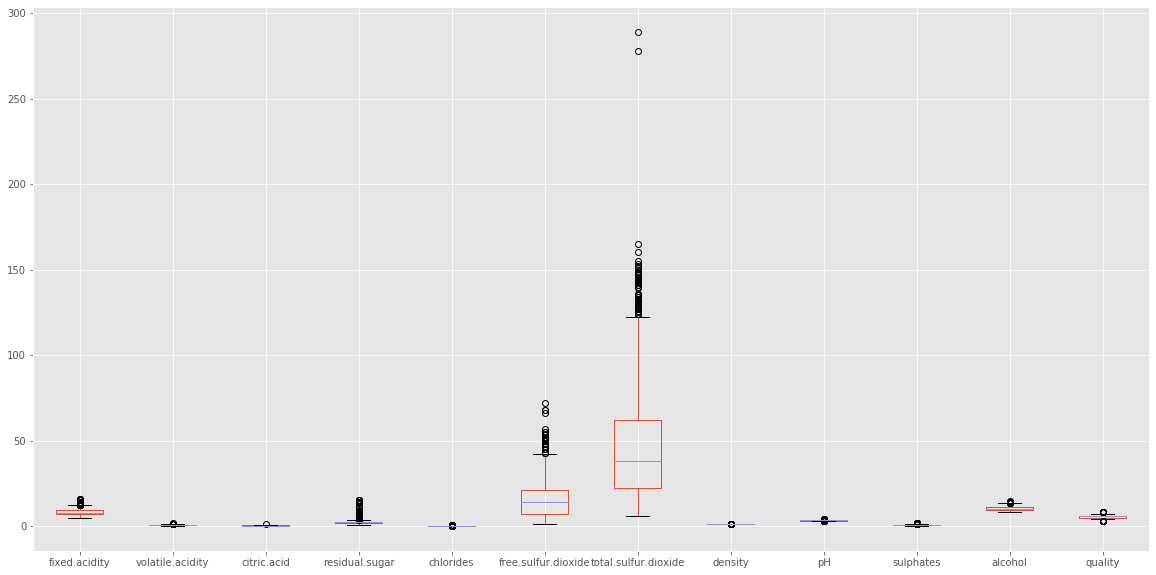

In [267]:
df.boxplot(figsize=(20,10) )

In [268]:
df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


De los anteriores podemos ver que: residual sugar, free sulfur dioxide y total sulfur dioxido presentan valores  extremos, pero parecen ser bastantes y por tanto decidimos continuar el momento dado que esa agrupación de valores extremos pueden pertencer a una calidad en especial (Esto es una hipotesis)

### Scaling values

A partir de las pruebas hechas en las fases subsecuentes se decide que es mejor escalar los valores debido que no estamos teniendo predicciones mayores a .50

In [269]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#df[[ 'fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxid

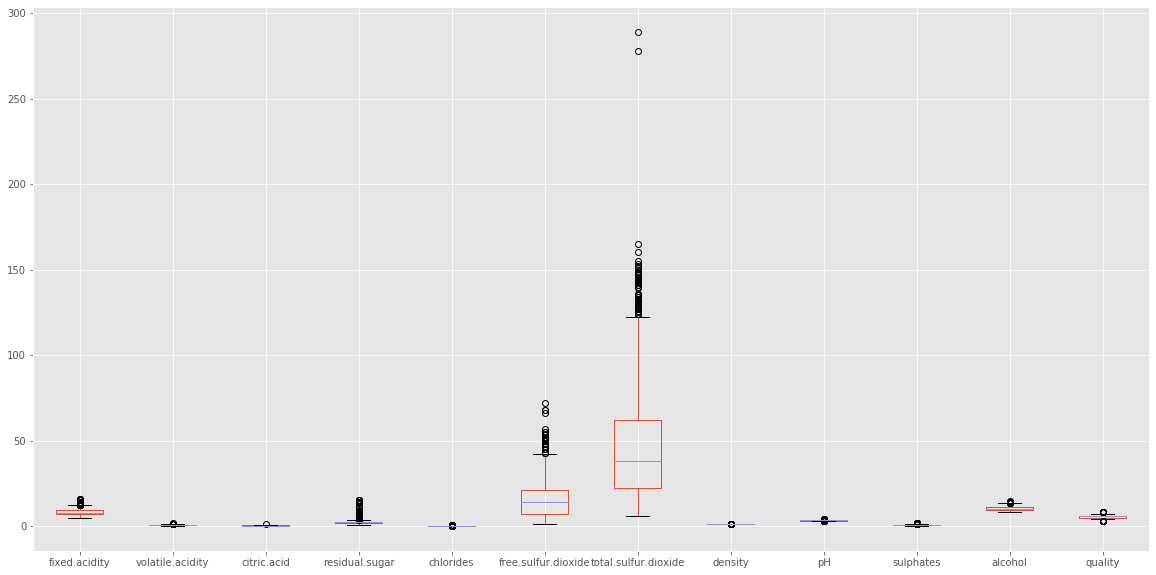

In [270]:
df.boxplot(figsize=(20,10) )

In [271]:
df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## One hot Encoding

In [272]:
dummy = pd.get_dummies(df['quality'],'qualityDummy')


In [273]:

df = pd.concat([df,dummy],axis =1)
df

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,qualityDummy_3,qualityDummy_4,qualityDummy_5,qualityDummy_6,qualityDummy_7,qualityDummy_8
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0,1,0,0,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,0,1,0,0,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,0,1,0,0,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,0,0,1,0,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0,1,0,0,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0,0,1,0,0,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5,0,0,1,0,0,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,0,0,0,0,1,0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7,0,0,0,0,1,0
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,0,0,1,0,0,0


## Partición de los datos en training y test

Según los siguientes elementos 

* Features: 'fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol'

* Label: "quality"

In [274]:
features = df[[ 'fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
label = df[['qualityDummy_3','qualityDummy_4','qualityDummy_5','qualityDummy_6','qualityDummy_7','qualityDummy_8']]

In [275]:
from sklearn.model_selection import train_test_split

In [276]:
X_train, X_test, Y_train, Y_test = train_test_split(features,label, random_state=13)

In [277]:
X_train.shape

(1199, 11)

## Creación de Modelo a partir de un DecisionTreeClassifier 

In [301]:
from sklearn.tree import DecisionTreeClassifier


In [302]:
DecisionTreeModel = DecisionTreeClassifier(criterion = "gini",max_depth = 5, max_features = 9,min_samples_leaf =7,max_leaf_nodes=6)

In [303]:
DecisionTreeModel.fit(X_train,Y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=9, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [304]:
from sklearn.metrics import accuracy_score


In [305]:
DecisionTreeModel.score(X_train, Y_train)

0.6046705587989991

In [306]:
DecisionTreeModel.score(X_test, Y_test)

0.5675

In [307]:
Y_predict = DecisionTreeModel.predict(X_test)


In [308]:
dt1 = accuracy_score(Y_test, Y_predict)
dt1


0.5675

In [286]:
from sklearn.tree import export_graphviz
export_graphviz(DecisionTreeModel, out_file='simple_tree.dot', feature_names=features.columns,impurity=False,class_names=[str(e) for e in  list(range(1,11))],filled=True)
from subprocess import call
call(['dot', '-T', 'png', 'simple_tree.dot', '-o', 'simple_tree.png'],shell = True)

127

<img src='simple_tree.png' width = 1000px heigth = 2000px>



La anterior es la mejor combinación que pudimos obtener

La siguiente es una prueba para intentar encontrar mejores selección de parametros, no obstante es necesario pulirlo más

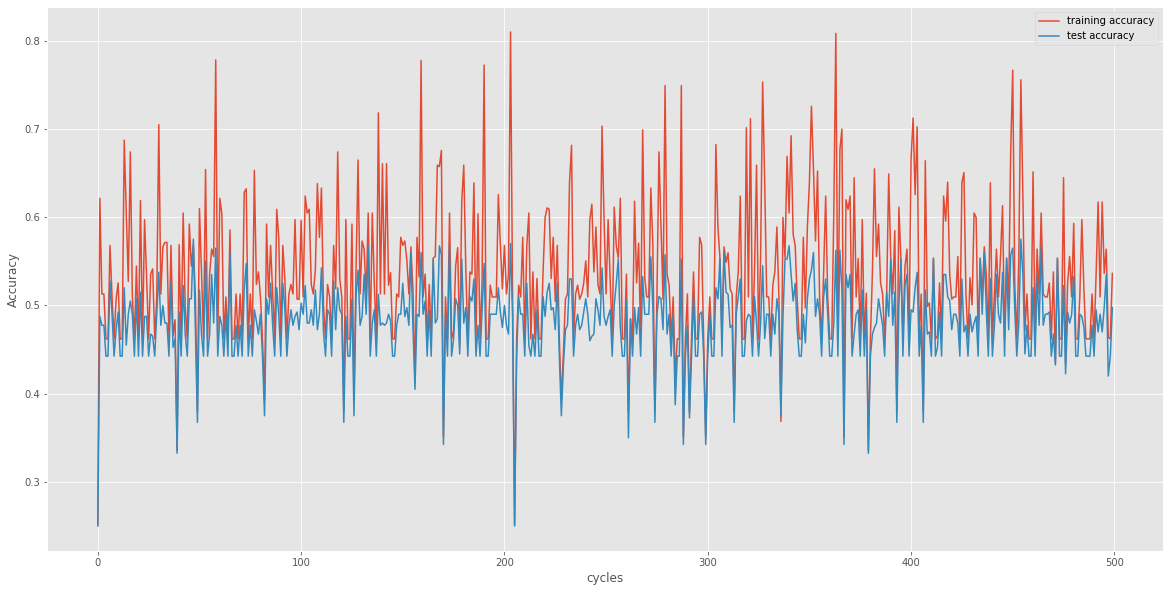

In [287]:
import matplotlib.pyplot as plt
import random
plt.style.use('ggplot')
%matplotlib inline

training_accuracy = []
test_accuracy = []


done = False
parameters = {
"max_depth_settings" : 1,
"max_features_settings" : 1,
"min_samples_leaf_settings" : 1,
"max_leaf_nodes_settings" : 2
    
    
}
#while not done:
for i in range (0,500):
#     for key in parameters:
    DecisionTreeModel = DecisionTreeClassifier(criterion = "gini",max_depth = parameters["max_depth_settings"], 
                                               max_features = parameters["max_features_settings"],
                                               min_samples_leaf = parameters["min_samples_leaf_settings"],
                                               max_leaf_nodes=parameters["max_leaf_nodes_settings"])
    DecisionTreeModel.fit(X_train, Y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(DecisionTreeModel.score(X_train, Y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(DecisionTreeModel.score(X_test, Y_test))


#     print (parameters[key])
#     print(key)
    for key in parameters:
        parameters[key] = random.randint(2,101)
    if parameters['max_features_settings'] > 11: parameters['max_features_settings'] =11 
    #if len(training_accuracy)>2 and (training_accuracy[-1]< training_accuracy[-2] and test_accuracy[-1]<test_accuracy[-2]):
    #   done = True

#  plt.plot(list(range(1,parameters['max_depth_settings'])), training_accuracy, label="training accuracy")
# plt.plot(list(range(1,parameters['max_depth_settings'])), test_accuracy, label="test accuracy")
plt.figure(figsize=(20,10))
plt.plot(training_accuracy, label="training accuracy")
plt.plot(test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("cycles")
plt.legend()



A partir de lo anterior podemos ver que existen demasiado overfitting en muchas de la selecciones dado que sque el testing score nunca aumenta más de .60

In [288]:
[str(e) for e in  list(range(1,11))]

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

## Modelo utilizando KneighborsClassifier


In [309]:
from sklearn.neighbors import KNeighborsClassifier

In [310]:
training_accuracy = []
test_accuracy = []

In [314]:
clf = KNeighborsClassifier(n_neighbors=6)
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

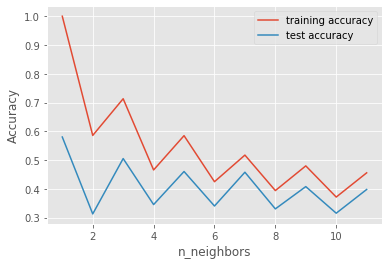

In [311]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

neighbors_settings = range(1, 12)
for n_neighbors in neighbors_settings:
    # se construye el modelo de clasificacion
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, Y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, Y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, Y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## Modelo utilizando RandomForest


In [292]:
from sklearn.ensemble import RandomForestClassifier


In [293]:
RandomForestModel = RandomForestClassifier(min_samples_leaf=5,min_samples_split=10,n_estimators=500, max_depth= None, random_state=10)


In [294]:
RandomForestModel.fit(X_train, Y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [295]:
Y_predict = RandomForestModel.predict(X_test)


In [296]:
rf = accuracy_score(Y_test,Y_predict)
rf

0.54

In [297]:
from sklearn.tree import export_graphviz
estimator = RandomForestModel.estimators_[0]
export_graphviz(estimator, out_file='complete_tree.dot', feature_names=features.columns,impurity=False,class_names=[str(e) for e in  list(range(1,11))],filled=True)
from subprocess import call
call(['dot', '-T', 'png', 'complete_tree.dot', '-o', 'complete_tree.png'],shell = True)

127

<img src='complete_tree.png' width = 1000px>



## Metodos de ensamble

Aqui tenemos que explicar que son los metodos de ensamble 

Los módelos por ensamble se refieren a aquellos que combinan varios metodos, ya sea diferentes o de los mismos con el fin de mejorar y optimizar la solución que se desea, en estos casos especificos la clasificación. (Zhang & Ma, 2012). Además como explican Zhang & Ma (2012) se basa en un principio de consulta entre los metodos para llegar a la mejor decisión posible. 

Siguiendo con los autores Zhang & Ma (2012), la meta de estos sistemas create varios clasificadores con bias similares en donde se combinan sus salidas por medio de una media para reducir la varianza.

In [298]:
from sklearn.ensemble import BaggingClassifier

In [299]:
BaggingClassifierModel = BaggingClassifier(max_samples = 20, n_estimators = 500,random_state=10,)
BaggingClassifierModel

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=20, n_estimators=500,
                  n_jobs=None, oob_score=False, random_state=10, verbose=0,
                  warm_start=False)

In [300]:
BaggingClassifierModel.fit(X_train, Y_train)

ValueError: bad input shape (1199, 6)

In [ ]:
bagclass = accuracy_score(Y_test,Y_predict)
bagclass 

Ante varias pruebas consideramos con los datos 'puros' se procede a escalar los valores del dataset 

In [ ]:
#from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# df[[ 'fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol']] =scaler.fit_transform(df[[ 'fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol']])


# Referencias

Zhang, C., Ma, Y.(2012). Ensemble machine learning: methods and applications. Springer Science & Business Media.

In [ ]:
random.randint(1,101)